# Unit test for staNMF

In [1]:
from staNMF import instability
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
n, d, K = 100, 100, 10
D = np.maximum(np.random.normal(size = (n, K)),0)
A = np.maximum(np.random.normal(size = (K, d)),0)
X = D @ A + np.random.normal(0, 1, size = (n,d))
mask = np.random.choice([0, 1], p=[.9, .1], size = (n, d))
masked_X = X #- 1000 * mask 

In [3]:
ins = instability(masked_X.T, n_trials=10, folder_name='tmp', random_state=1000)

In [4]:
Ks = list(range(6, 15))
output = ins.fit_transform(Ks, parallel = False)
output

array([[1.11146837e-01, 3.48214460e-02],
       [1.01788599e-01, 2.73257814e-02],
       [1.91654454e-02, 8.00007071e-03],
       [9.56070498e-04, 8.44019373e-04],
       [9.04635227e-07, 3.12552783e-07],
       [5.66212248e-02, 1.01467008e-02],
       [6.56903073e-02, 1.43771707e-02],
       [9.22732295e-02, 1.17519460e-02],
       [1.10176156e-01, 1.45321637e-02]])

Text(0.5, 1.0, 'instability for different Ks')

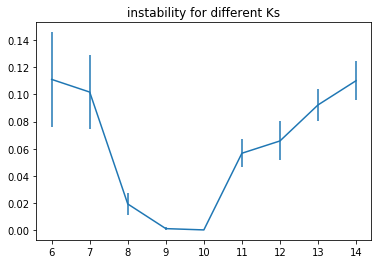

In [5]:
plt.errorbar(x = Ks, y = output[:,0], yerr=output[:,1])
plt.title('instability for different Ks')

## test cross validation

In [6]:
Ks = list(range(6, 15))
output = ins.transform_cv(Ks, nfolds=2, use_training_error=True)
output

Calculating prediction instability for 6
num_samples larger than total_sample, force it to be smaller.
Calculating prediction instability for 7
Calculating prediction instability for 8
Calculating prediction instability for 9
Calculating prediction instability for 10
Calculating prediction instability for 11
Calculating prediction instability for 12
Calculating prediction instability for 13
Calculating prediction instability for 14


array([[9.42569696e-01, 1.01016579e-03],
       [8.71414038e-01, 3.70598588e-04],
       [8.02236164e-01, 3.82877429e-04],
       [7.47216408e-01, 4.42118274e-05],
       [7.03093729e-01, 1.09791646e-06],
       [6.82498470e-01, 4.61543655e-04],
       [6.60717262e-01, 5.95788150e-04],
       [6.40720785e-01, 5.73624559e-04],
       [6.20955130e-01, 9.18039348e-04]])

Text(0.5, 1.0, 'MSE for different Ks')

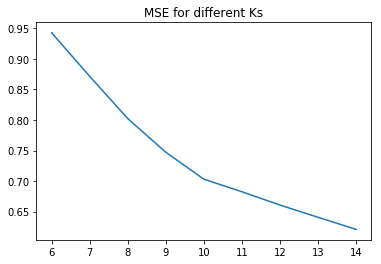

In [7]:
plt.errorbar(x = Ks, y = output[:,0], yerr=output[:,1])
plt.title('MSE for different Ks')

## test parallel

In [13]:
%timeit ins.fit(Ks, parallel = True, processes = len(Ks))

4.19 s ± 79.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit ins.fit(Ks, parallel = False)

6.67 s ± 41.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
